In [23]:
import pandas as pd
import numpy as np
import os
import re
import datetime
import matplotlib.pyplot as plt

plt.style.use('seaborn')

from application.utils.ingestion import fetch_data, fetch_ts
from application.utils.processing import convert_to_ts

from application.utils.plot import ts_plot, ts_plot_pred

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_dir = os.path.join("data","cs-train")
df = fetch_data(data_dir)

In [3]:
ts_data = fetch_ts(data_dir)

... loading ts data from files


In [5]:
ts_data['all']

,date,purchases,unique_invoices,unique_streams,total_views,year_month,revenue
0,2017-11-28,3223,166,1345,15047,2017-11,14450.54
1,2017-11-29,3277,133,1397,14159,2017-11,13411.96
2,2017-11-30,3002,150,1335,15766,2017-11,13290.25
3,2017-12-01,2559,107,1256,12524,2017-12,9687.28
4,2017-12-02,402,32,287,3313,2017-12,1443.26
...,...,...,...,...,...,...,...
606,2019-07-27,0,0,0,0,2019-07,0.00
607,2019-07-28,1271,43,789,7004,2019-07,3150.26
608,2019-07-29,1200,51,770,7025,2019-07,4374.54
609,2019-07-30,1369,61,862,8492,2019-07,16374.76


In [52]:
date = '2019-12-01'
pd.to_datetime(date, format='%Y-%m-%d').to_numpy() #+ np.timedelta64(1,'M')

numpy.datetime64('2019-12-01T00:00:00.000000000')

In [55]:
pd.Timestamp(date) + pd.DateOffset(months=1)

Timestamp('2020-01-01 00:00:00')

In [57]:
np.arange(pd.Timestamp(date).to_numpy(), (pd.Timestamp(date) + pd.DateOffset(months=1)).to_numpy(), dtype='datetime64[D]')

array(['2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04',
       '2019-12-05', '2019-12-06', '2019-12-07', '2019-12-08',
       '2019-12-09', '2019-12-10', '2019-12-11', '2019-12-12',
       '2019-12-13', '2019-12-14', '2019-12-15', '2019-12-16',
       '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
       '2019-12-21', '2019-12-22', '2019-12-23', '2019-12-24',
       '2019-12-25', '2019-12-26', '2019-12-27', '2019-12-28',
       '2019-12-29', '2019-12-30', '2019-12-31'], dtype='datetime64[D]')

In [60]:
pd.Timestamp(date).to_numpy() + np.timedelta64(1,'D')

numpy.datetime64('2019-12-02T00:00:00.000000000')

In [ ]:
# add few days
curr = ts_data['all'].date.values[-1] + np.timedelta64(1,'D')
plus_30 = curr + np.timedelta64(30,'D')
next_df = pd.DataFrame({'ds':np.arange(curr,plus_30,dtype='datetime64[D]')})

In [37]:
curr = ts_data['all'].date.values[-1] + np.timedelta64(1,'D')
plus_30 = curr + np.timedelta64(30,'D')
next_df = pd.DataFrame({'ds':np.arange(curr,plus_30,dtype='datetime64[D]')})

In [38]:
df = ts_data['all'][['date', 'revenue']].copy(deep=True)
df.rename(columns={'date':'ds', 'revenue':'y'}, inplace=True)
#df = df[-365:]

In [39]:
from fbprophet import Prophet
m = Prophet()
m.fit(df)
y_pred = m.predict(next_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
y_pred.yhat.mean()

4809.991118900196

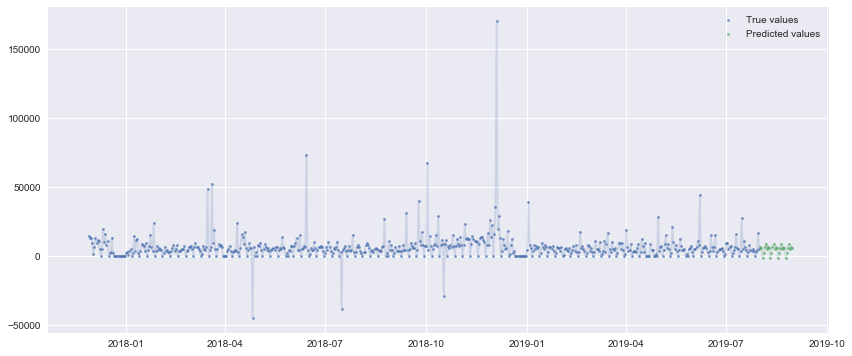

In [41]:
ts_plot_pred(df.ds,df.y,y_pred.ds,y_pred.yhat,figx=14,figy=6)

In [3]:
df.head()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,13085.0,28,489434,11,6.95,85048,12,2017,2017-11-28
1,United Kingdom,13085.0,28,489434,11,6.75,79323W,12,2017,2017-11-28
2,United Kingdom,13085.0,28,489434,11,2.10,22041,21,2017,2017-11-28
3,United Kingdom,13085.0,28,489434,11,1.25,21232,5,2017,2017-11-28
4,United Kingdom,13085.0,28,489434,11,1.65,22064,17,2017,2017-11-28


In [4]:
df.tail()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
815006,United Kingdom,16098.0,31,562271,7,3.75,22725,2,2019,2019-07-31
815007,United Kingdom,16098.0,31,562271,7,3.75,22726,12,2019,2019-07-31
815008,United Kingdom,16098.0,31,562271,7,3.75,22727,6,2019,2019-07-31
815009,United Kingdom,14056.0,31,562269,7,2.95,22090,2,2019,2019-07-31
815010,United Kingdom,15628.0,31,562163,7,1.65,22558,12,2019,2019-07-31


## Missing values

In [5]:
## missing values summary
print("Missing Value Summary\n{}".format("-"*35))
print(df.isnull().sum(axis = 0))

Missing Value Summary
-----------------------------------
country              0
customer_id     189762
day                  0
invoice              0
month                0
price                0
stream_id            0
times_viewed         0
year                 0
invoice_date         0
dtype: int64


In [6]:
df.customer_id.isnull().sum()/df.shape[0]

0.2328336672756564

In [7]:
df[df.customer_id.isnull()].country.unique()

array(['United Kingdom', 'Nigeria', 'EIRE', 'Bahrain',
       'United Arab Emirates', 'Bermuda', 'Sweden', 'France', 'Hong Kong',
       'Lebanon', 'RSA', 'Unspecified', 'Portugal', 'Israel',
       'Switzerland'], dtype=object)

In [8]:
df_total_year = df[['year', 'country']].groupby(['year']).count()
df_total_year.columns = ['total']

df_missing_year = df[df.customer_id.isnull()][['year', 'country']].groupby(['year']).count()
df_missing_year.columns = ['missing']

df_missing_perc = pd.concat([df_missing_year,df_total_year],axis=1)
df_missing_perc['percentage'] = df_missing_perc.missing/df_missing_perc.total
df_missing_perc

,missing,total,percentage
year,,,
2017,13468,45228,0.297780
2018,110090,522714,0.210612
2019,66204,247069,0.267958


## Revenue

In [9]:
df_revenue_country = df[['country', 'price']].groupby('country').sum()
df_revenue_country.columns = ['revenue']
df_revenue_country.sort_values(by='revenue', inplace=True, ascending=False)

In [10]:
df_revenue_country['revenue'].values[0] / df_revenue_country['revenue'].values[1]

32.89006713512097

<BarContainer object of 43 artists>

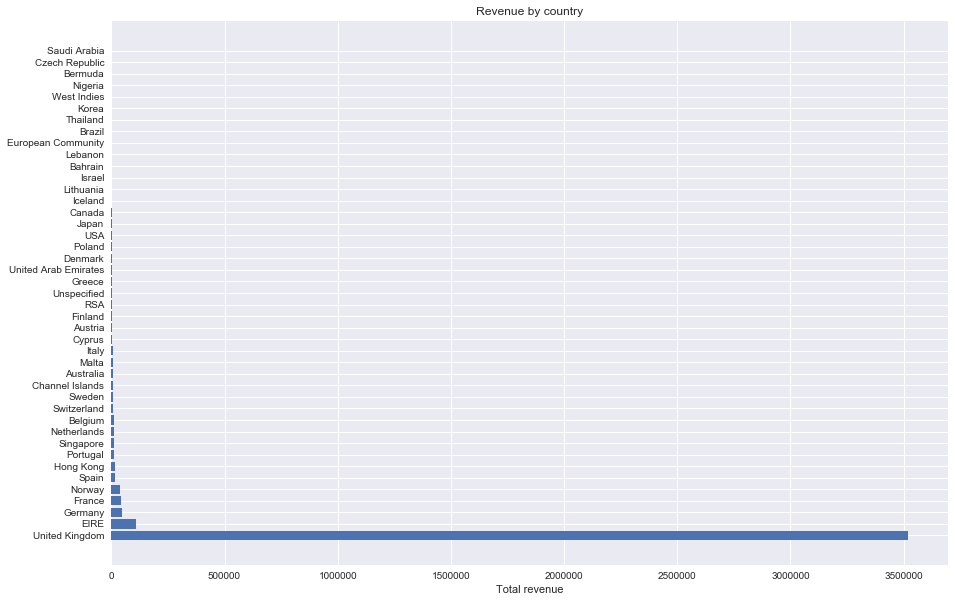

In [11]:
plt.figure(figsize=(15,10))
plt.title("Revenue by country")
plt.xlabel("Total revenue")
plt.barh(df_revenue_country.index, df_revenue_country.revenue)

<BarContainer object of 43 artists>

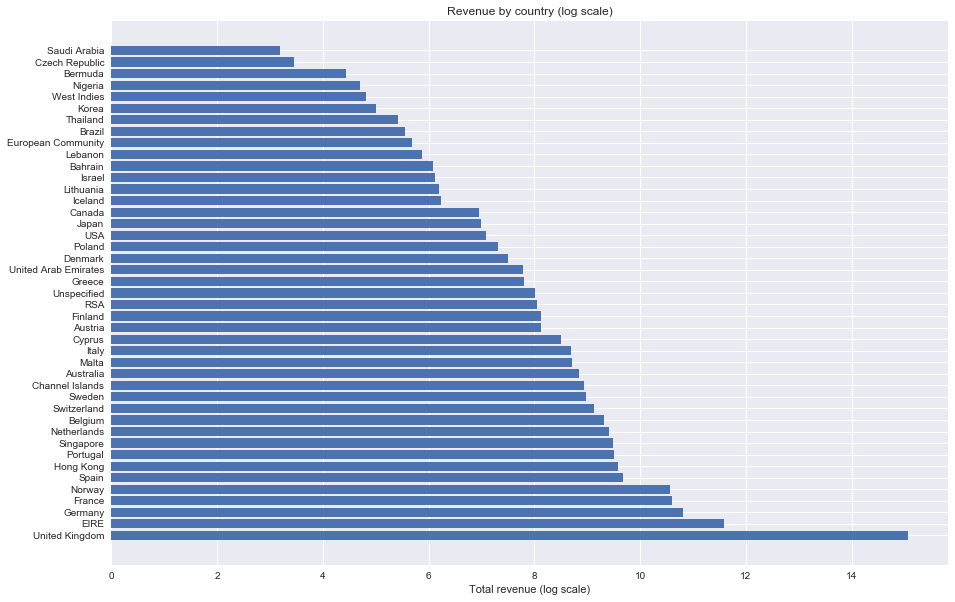

In [12]:
plt.figure(figsize=(15,10))
plt.title("Revenue by country (log scale)")
plt.xlabel("Total revenue (log scale)")
plt.barh(df_revenue_country.index, np.log(df_revenue_country.revenue))

## Dates

In [13]:
df.invoice_date.nunique()

495

In [14]:
df.invoice_date.min(), df.invoice_date.max()

(Timestamp('2017-11-28 00:00:00'), Timestamp('2019-07-31 00:00:00'))

In [15]:
(df.invoice_date.max() -  df.invoice_date.min()).days + 1

611

In [16]:
import time
time.time()

1598573424.6907344

In [17]:
import time
time_start = time.time()

curr = df.invoice_date.min()
end = df.invoice_date.max()
date_list = []

while (curr<=end):
    date_list.append(curr)
    curr += datetime.timedelta(1)
    
dates_without_invoices = sorted(list(set(date_list).difference(set(df.invoice_date))))
print(len(dates_without_invoices))

print(time.time()-time_start)

116
1.4649627208709717


In [18]:
time_start = time.time()

invoice_dates_min = df['invoice_date'].min().strftime("%Y-%m-%d")
invoice_dates_max = (df['invoice_date'].max() + datetime.timedelta(1)).strftime("%Y-%m-%d")

df_dates = df['invoice_date'].values.astype('datetime64[D]')
days = np.arange(invoice_dates_min,invoice_dates_max,dtype='datetime64[D]')

print(len(set(days).difference(df_dates)))

#print(len(dates_without_invoices))

print(time.time()-time_start)

116
0.10603880882263184


In [19]:
df_revenue_date = df[['invoice_date', 'price']].groupby('invoice_date').sum()
df_revenue_date.columns = ['revenue']
df_revenue_date.sort_values(by='invoice_date', inplace=True, ascending=True)

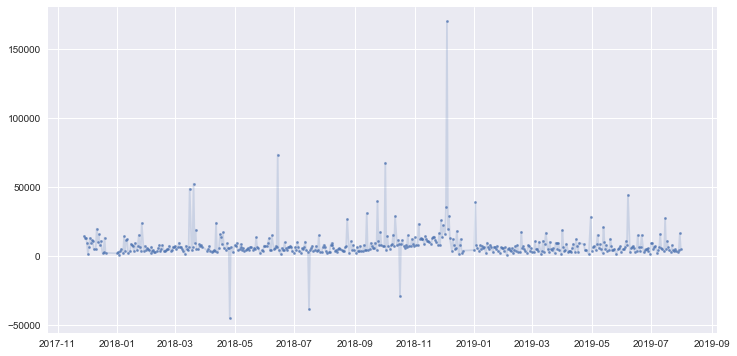

In [20]:
ts_plot(df_revenue_date.index, df_revenue_date.revenue, figx=12, figy=6)

In [21]:
df_revenue_date[df_revenue_date.revenue<0]

,revenue
invoice_date,
2018-04-26,-44990.049
2018-07-16,-38702.940
2018-10-17,-29374.970


In [22]:
df[(df.invoice_date=="2018-04-26")&(df.price<0)]

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
180418,United Kingdom,NaN,26,506401,4,-53594.36,B,1,2018,2018-04-26


In [23]:
invoice_dates_min = df['invoice_date'].min().strftime("%Y-%m-%d")
invoice_dates_max = (df['invoice_date'].max() + datetime.timedelta(1)).strftime("%Y-%m-%d")

df_dates = df['invoice_date'].values.astype('datetime64[D]')
days = np.arange(invoice_dates_min,invoice_dates_max,dtype='datetime64[D]')

purchases = np.array([np.where(df_dates==day)[0].size for day in days])

In [24]:
day = days[0]
day

numpy.datetime64('2017-11-28')

In [25]:
np.where(df_dates==day)[0].size

3223

In [26]:
df[df.invoice_date==day].shape

(3223, 10)

# Time series (converted)

In [27]:
df.invoice_date.min(), df.invoice_date.max()

(Timestamp('2017-11-28 00:00:00'), Timestamp('2019-07-31 00:00:00'))

In [28]:
df_ts = convert_to_ts(df)

In [29]:
df_ts.head()

,date,purchases,unique_invoices,unique_streams,total_views,year_month,revenue
0,2017-11-28,3223,166,1345,15047,2017-11,14450.54
1,2017-11-29,3277,133,1397,14159,2017-11,13411.96
2,2017-11-30,3002,150,1335,15766,2017-11,13290.25
3,2017-12-01,2559,107,1256,12524,2017-12,9687.28
4,2017-12-02,402,32,287,3313,2017-12,1443.26


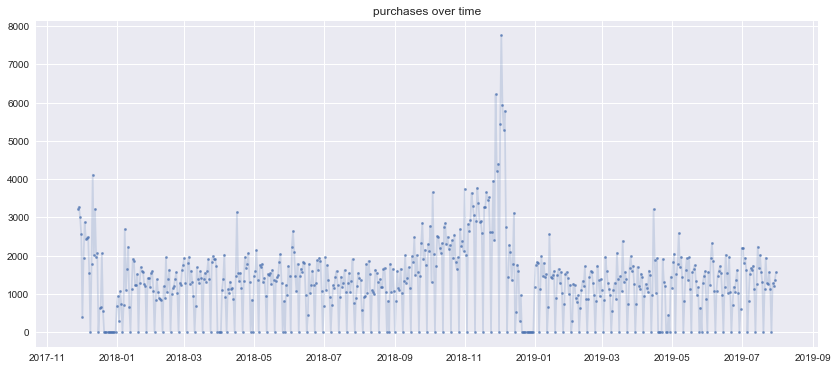

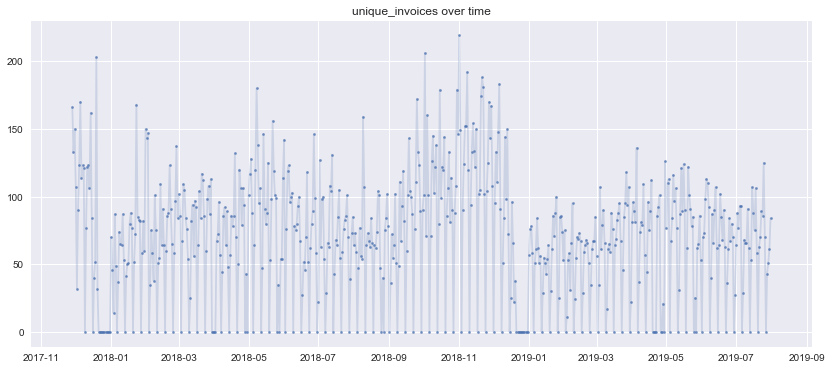

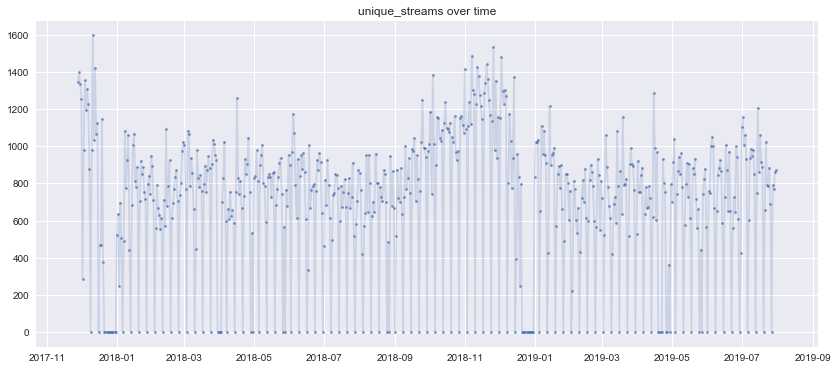

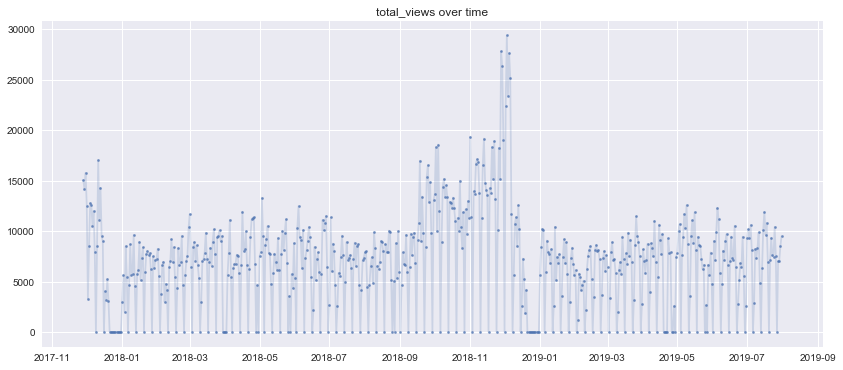

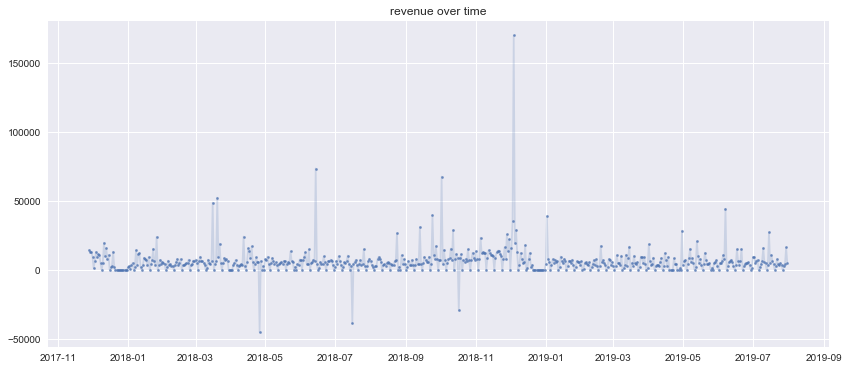

In [30]:
for col in ['purchases', 'unique_invoices', 'unique_streams', 'total_views', 'revenue']:
    ts_plot(df_ts.date,df_ts[col],figx=14,figy=6, title="{} over time".format(col))

In [31]:
df_ts[df_ts.revenue<0]

,date,purchases,unique_invoices,unique_streams,total_views,year_month,revenue
149,2018-04-26,2058,106,1046,11371,2018-04,-44990.049
230,2018-07-16,1448,68,786,8907,2018-07,-38702.940
323,2018-10-17,2491,122,1092,13319,2018-10,-29374.970


In [32]:
df[(df.price<0)]

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
180418,United Kingdom,NaN,26,506401,4,-53594.36,B,1,2018,2018-04-26
276274,United Kingdom,NaN,16,516228,7,-44031.79,B,1,2018,2018-07-16
403469,United Kingdom,NaN,17,528059,10,-38925.87,B,1,2018,2018-10-17


In [33]:
df[df.stream_id=="B"]

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
180418,United Kingdom,NaN,26,506401,4,-53594.36,B,1,2018,2018-04-26
276274,United Kingdom,NaN,16,516228,7,-44031.79,B,1,2018,2018-07-16
403469,United Kingdom,NaN,17,528059,10,-38925.87,B,1,2018,2018-10-17


In [34]:
import sys
all_data = fetch_ts(data_dir)

... loading ts data from files


In [35]:
all_data

{'all':            date  purchases  unique_invoices  unique_streams  total_views  \
 0    2017-11-01          0                0               0            0   
 1    2017-11-02          0                0               0            0   
 2    2017-11-03          0                0               0            0   
 3    2017-11-04          0                0               0            0   
 4    2017-11-05          0                0               0            0   
 ..          ...        ...              ...             ...          ...   
 602  2019-06-26       1358               67             999         6420   
 603  2019-06-27       1620               80             944         9435   
 604  2019-06-28       1027               70             607         5539   
 605  2019-06-29          0                0               0            0   
 606  2019-06-30        602               27             423         2534   
 
     year_month  revenue  
 0      2017-11     0.00  
 1      2017-